In [1]:
# This code was created by Robert Zupan on 10/07/2020
# It was last updated:
# - 10/7/2020 - creation
# - 1/17/2020 - updated to python (instead of Matlab)
# The purpose of this script is to analyze the traffic 
# accident data for the Data Incubator Capstone project.

In [1]:
#Imports and loading the csv
import pandas as pd
import numpy as np

D = pd.read_csv('US_Accidents_June20.csv')

In [4]:
#First step, I need to create a dictionary that has the latitude/longitude pairings and how often they occur.
from collections import defaultdict

unLatLon = defaultdict(int)

for ii in range(rows):
    unLatLon[(D['Start_Lat'][ii],D['Start_Lng'][ii])] += 1

In [5]:
#Next I just want some basic statistics.
import statistics as stats

meanCrash = stats.mean(unLatLon.values())
stdvCrash = stats.stdev(unLatLon.values())

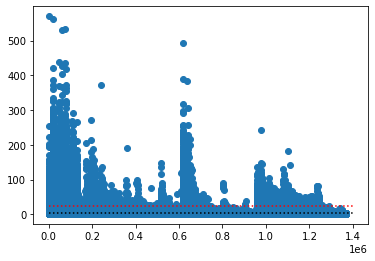

In [6]:
#Now let's plot it and take a look.
import matplotlib.pylab as plt

xMean = [0,1400000]


LatLonID = list(range(len(unLatLon)))
plt.scatter(LatLonID,unLatLon.values())
plt.plot(xMean,[meanCrash,meanCrash],color="black", linestyle=':')
plt.plot(xMean,[meanCrash+3*stdvCrash,meanCrash+3*stdvCrash],color = "red", linestyle=':')

In [7]:
#Get a rough idea of the number of outliers based on mean and stdv.

numOut = 0
for val in unLatLon.values():
    if val > meanCrash+3*stdvCrash:
        numOut += 1

In [8]:
numOut

17198

In [10]:
#Dump the data using Dill
import dill
dill.dump(unLatLon,open('unLatLon.pkd','wb'))